# 外れ値の扱い

しばしば、外れ値は分析の邪魔になります。少数の外れ値が、結果全体をゆがませるのは望ましくありません。久しぶりに、大富豪を混ぜた収入分布のデータを作りましょう。

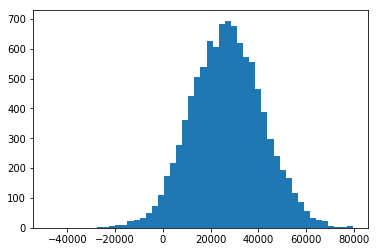

In [2]:
%matplotlib inline
import numpy as np

incomes = np.random.normal(27000, 15000, 10000)
incomes = np.append(incomes, [1000000000])

import matplotlib.pyplot as plt
plt.hist(incomes, 50)
plt.show()

これを見ても何もわかりませんね。一人の大富豪が、ヒストグラム上においてその他の人々を一本の線に押し込めてしまいました。その上、収入の平均までおかしくしています。

In [2]:
incomes.mean()

126713.54327205669

外れ値がなぜ発生し、どこから来るのか理解するのは大事なことです。そして、これを除去してもいいのか解析の目的と照らし合わせて考える必要があります。もし、典型的な市民を解析し理解したいのであれば、大富豪を除去していもいいように思えます。

実は、大富豪を除去するよりも良い方法があります。データセットの中央値よりも標準偏差2つ分より離れた値を除去する方法です。

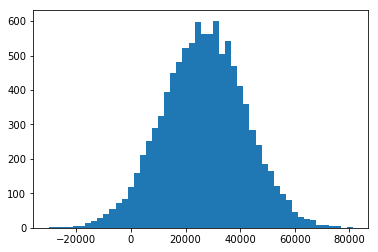

In [3]:
def reject_outliers(data):
    u = np.median(data)
    s = np.std(data)
    filtered = [e for e in data if (u - 2 * s < e < u + 2 * s)]
    return filtered

filtered = reject_outliers(incomes)

plt.hist(filtered, 50)
plt.show()

良くなりましたね。平均値も、意味をなすようになりました。

In [4]:
np.mean(filtered)

26726.214626383888

## アクティビティ

単一の外れ値の代わりに、いくつかのランダムな外れ値をデータに加えてみましょう。また、外れ値の検出に、標準偏差に様々な数をかけた値を使ってみましょう。そして、それらが結果にどのような影響を及ぼすのか確かめてみましょう。